Idea of generating space-time plots rather than making them by hand:

- Plot e.g. SIP/AIP/DIP trajectories, add annotations and tick marks for names and places.
- Highlight events [like the dots on these plots](https://matplotlib.org/3.3.0/gallery/text_labels_and_annotations/annotation_demo.html#using-multiple-coordinate-systems-and-axis-types)
- Highlight time periods [like this](https://datavizpyr.com/highlight-a-time-range-in-time-series-plot-in-python-with-matplotlib/)

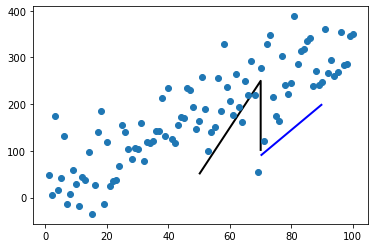

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

np.random.seed(5)
x = np.arange(1, 101)
y = 20 + 3 * x + np.random.normal(0, 60, 100)
plt.plot(x, y, "o")

# Takes list of lines, where each line is a sequence of coordinates
l1 = [(70, 100), (70, 250), (50,50)]
l2 = [(70, 90), (90, 200)]
lc = LineCollection([l1, l2], color=["k","blue"], lw=2)

plt.gca().add_collection(lc)

plt.show()

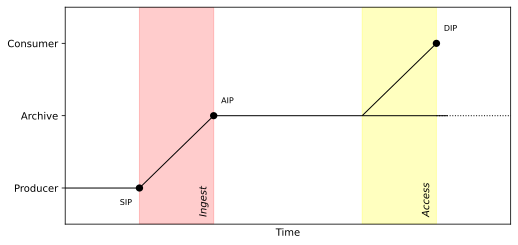

In [21]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.patches import Ellipse

plt.rc('font', size=10)

fig, ax=plt.subplots(figsize=[8,4])
ax.set_xlim([1,7])
ax.set_ylim([0.5,3.5])

ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Producer', 'Archive', 'Consumer'])
# No x-axis ticks
ax.set_xticks([])
ax.set_xlabel('Time')

l1 = [(1, 1), (2, 1), (3,2), (6,2), (6.15,2)]
l2 = [(5,2), (6, 3)]
l3 = [(6,2), (7,2)]
lc = LineCollection([l1, l2, l3], color="k", lw=1, linestyle=['-','-',':'])

ax.add_collection(lc)

el = Ellipse((2, 1), 0.1, 0.1, facecolor='k', alpha=1.0)
ax.add_artist(el)
ax.annotate('SIP', fontsize=8,
            xy=(2, 1), xycoords='data',
            xytext=(1.9, 0.85), textcoords='data',
            horizontalalignment='right', verticalalignment='top')

el = Ellipse((3, 2), 0.1, 0.1, facecolor='k', alpha=1.0)
ax.add_artist(el)
ax.annotate('AIP', fontsize=8,
            xy=(3, 2), xycoords='data',
            xytext=(3.1, 2.15), textcoords='data',
            horizontalalignment='left', verticalalignment='bottom')


el = Ellipse((6, 3), 0.1, 0.1, facecolor='k', alpha=1.0)
ax.add_artist(el)
ax.annotate('DIP', fontsize=8,
            xy=(6, 3), xycoords='data',
            xytext=(6.1, 3.15), textcoords='data',
            horizontalalignment='left', verticalalignment='bottom')

ax.axvspan(2, 3, alpha=0.2, color='red', label='Ingest')
ax.annotate('Ingest', fontsize=10, rotation=90, style='italic',
            xy=(2.8, 0.6), xycoords='data',
            horizontalalignment='left', verticalalignment='bottom')

ax.axvspan(5, 6, alpha=0.25, color='yellow', label='Access')
ax.annotate('Access', fontsize=10, rotation=90, style='italic',
            xy=(5.8, 0.6), xycoords='data',
            horizontalalignment='left', verticalalignment='bottom')


#plt.legend(frameon=False, loc='upper center')
plt.show()

In [2]:
# Make this figure available for use in other pages:
from myst_nb import glue
glue("spacetime_oais_fig", fig, display=False)

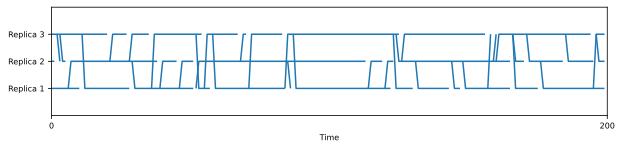

In [4]:
def simulate_replication(reps=3, total_time=100, death_chance=0.05):
    old_lines = []
    
    lines = []
    for r in range(reps):
        lines.append([])
    
    state = [1] * reps
    
    for t in range(0, total_time):
        for r in range(reps):
            # If still alive, record it:
            if state[r]:
                lines[r].append([t,r])
                
        # Decide what happens:
        if t > 0:
            for r in range(reps):
                # Attempt to repair any damage:
                if not state[r]:
                    replist = list(range(reps))
                    np.random.shuffle(replist)
                    for r2 in replist:
                        if state[r2]:
                            #print("Repair t=%s, r=%s r2=%s" %(t, r, r2))
                            state[r] = state[r2]
                            if len(lines[r]) > 0:
                                old_lines.append(lines[r])
                            lines[r] = [[t,r2],[t+1,r]]
                            break
                        
            for r in range(reps):
                # Decide if this replica gets damaged:
                if state[r] and np.random.uniform() < death_chance:
                    #print("t=%s, Death to %s" % (t, r))
                    state[r] = 0
                
                    
    for r in range(reps):
        if len(lines[r]) > 0:
            old_lines.append(lines[r])
    
    return old_lines
        

np.random.seed(10)
total_time = 200
lines = simulate_replication(total_time=total_time)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

plt.rc('font', size=8)

fig, ax=plt.subplots(figsize=[10,2], dpi=300)
ax.set_xlim([0,total_time])
ax.set_ylim([-1,3])

ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['Replica 1', 'Replica 2', 'Replica 3'])
# No x-axis ticks
ax.set_xticks([0, total_time])
#ax.set_xticks(range(0,20))
ax.set_xlabel('Time')

lc = LineCollection(lines)

ax.add_collection(lc)

plt.show()